**IMPORT NECESSARY LIBRARIES**

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

**MOUNT GOOGLE DRIVE**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CHANGE THE CURRENT WORKING DIRECTORY

In [16]:
os.chdir("/content/drive/My Drive/PS-2019-259_COSC44323/PS-2019-259-Dataset/")
os.getcwd()

'/content/drive/My Drive/PS-2019-259_COSC44323/PS-2019-259-Dataset'

LOAD AND DISPLAY AN IMAGE FROM THE DATASET TO VERIFY THE CONNECTION

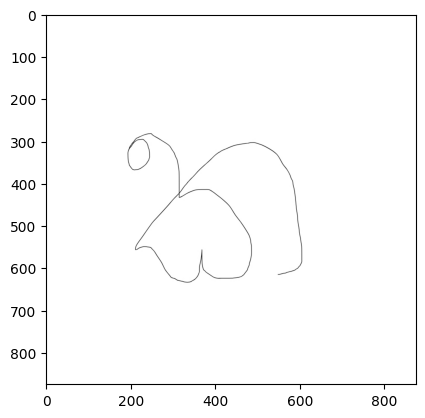

In [17]:
#Specify the location to the image in my Training dataset and load the image using load_img from Keras
img = image.load_img("PS-2019-259-TrainingData/PS-2019-259-ka/48ka.jpeg")

#Display the loaded image using matplotlib
plt.imshow(img)


In [18]:
# Read the image using OpenCV (cv2) and retrieve its shape
cv2.imread("PS-2019-259-TrainingData/PS-2019-259-ka/48ka.jpeg").shape

(875, 875, 3)

In [19]:
# Create an ImageDataGenerator for training data with pixel value rescaling
train = ImageDataGenerator(rescale = 1/255)


**CREATE TRAINING DATASET BY USING ImageDataGenerator**

In [20]:
# Create a training dataset generator using the training ImageDataGenerator
train_dataset = train.flow_from_directory('PS-2019-259-TrainingData/', target_size = (200,200),batch_size = 3, class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [21]:
# Display the mapping of class names to their indices in the training dataset
train_dataset.class_indices

{'PS-2019-259-ka': 0, 'PS-2019-259-la': 1}

In [22]:
# Retrieve the array of class indices for each sample in the training dataset
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**THE CNN ARCHITECTURE SPECIFICATION - THE SEQUENTIAL MODEL**

In [23]:
# Create a Sequential model
# Convolutional layer with 16 filters, each of size (3, 3), and ReLU activation
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [24]:
# Compile the model with binary crossentropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

**TRAIN THE MODEL WITH THE TRAINING DATASET OF TWO HANDWRITTEN CHARACTERS**

In [34]:
# Train the model using the training dataset with 30 epochs
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30
                      )

Epoch 1/30
5/5 [==============================] - 3s 529ms/step - loss: 7.0305e-06 - accuracy: 1.0000
Epoch 2/30
5/5 [==============================] - 4s 782ms/step - loss: 2.0674e-06 - accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - 3s 538ms/step - loss: 3.4546e-06 - accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - 3s 527ms/step - loss: 6.8488e-07 - accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 3s 631ms/step - loss: 1.0681e-06 - accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 3s 524ms/step - loss: 2.6651e-06 - accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 3s 518ms/step - loss: 2.0415e-06 - accuracy: 1.0000
Epoch 8/30
5/5 [==============================] - 3s 727ms/step - loss: 2.1067e-06 - accuracy: 1.0000
Epoch 9/30
5/5 [==============================] - 3s 534ms/step - loss: 4.9753e-07 - accuracy: 1.0000
Epoch 10/30
5/5 [==============================] - 3s 518ms/step - loss: 3.8092e-0

**TESTING THE DATA**

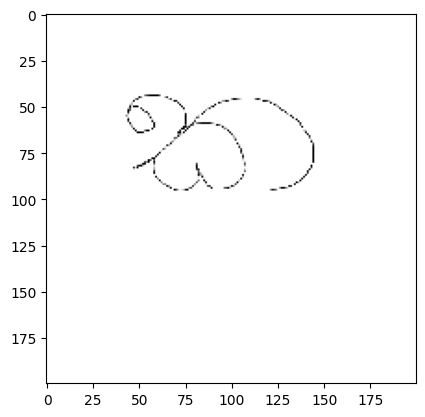

1/1 [==============================] - 0s 41ms/step
This is the character ක


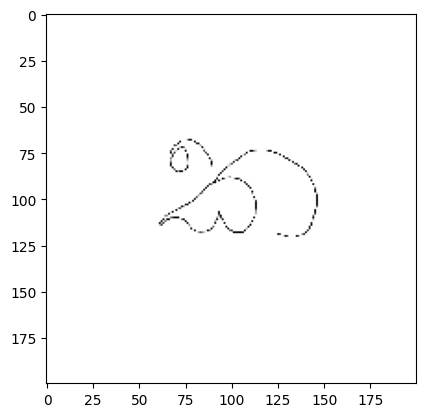

1/1 [==============================] - 0s 39ms/step
This is the character ක


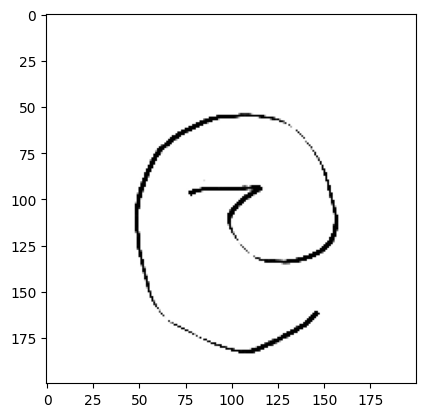

1/1 [==============================] - 0s 46ms/step
This is the character ල


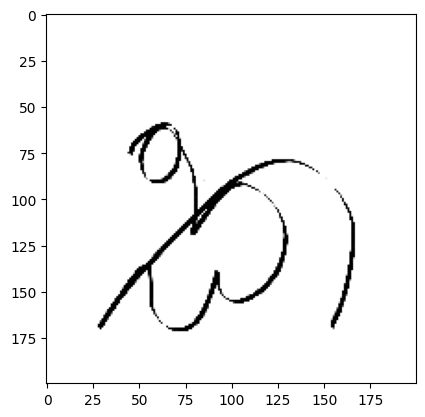

1/1 [==============================] - 0s 42ms/step
This is the character ක


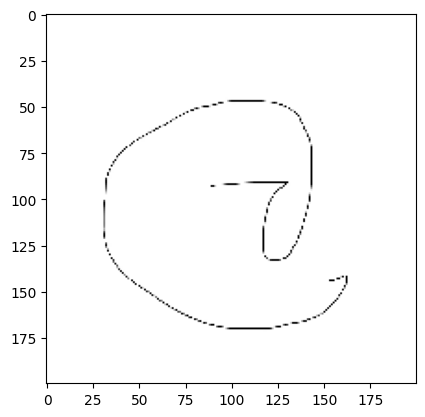

1/1 [==============================] - 0s 38ms/step
This is the character ක


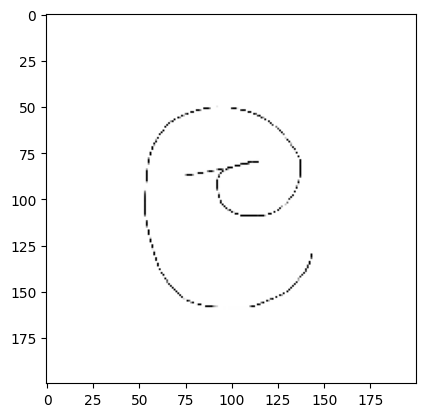

1/1 [==============================] - 0s 39ms/step
This is the character ල


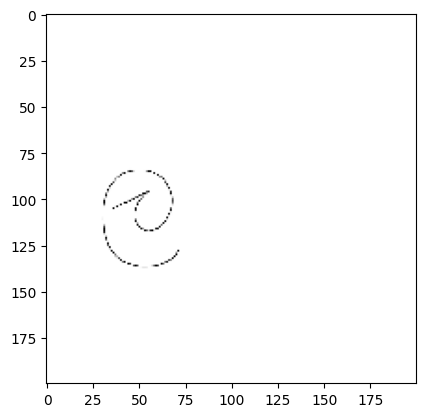

1/1 [==============================] - 0s 39ms/step
This is the character ල


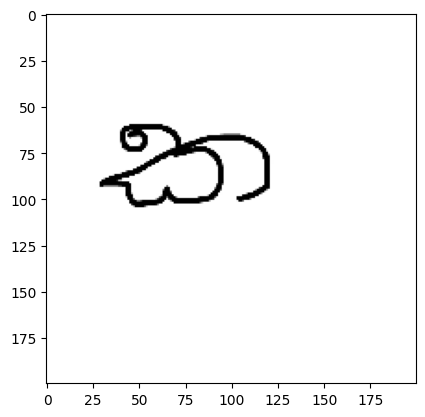

1/1 [==============================] - 0s 39ms/step
This is the character ක


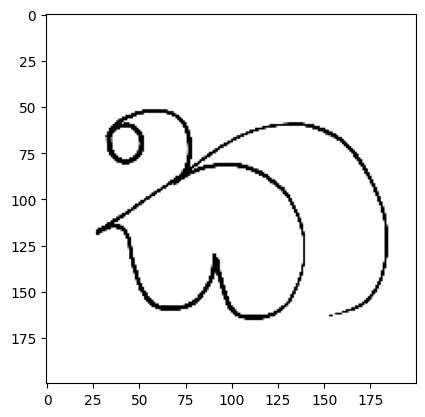

1/1 [==============================] - 0s 38ms/step
This is the character ල


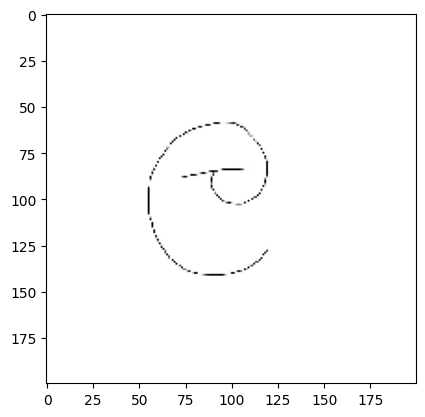

1/1 [==============================] - 0s 41ms/step
This is the character ල


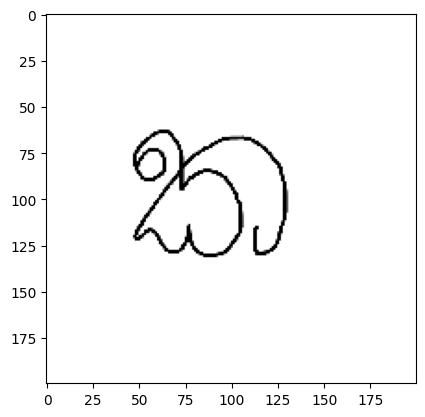

1/1 [==============================] - 0s 39ms/step
This is the character ක


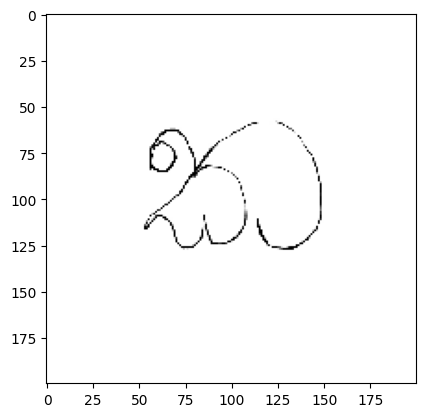

1/1 [==============================] - 0s 43ms/step
This is the character ක


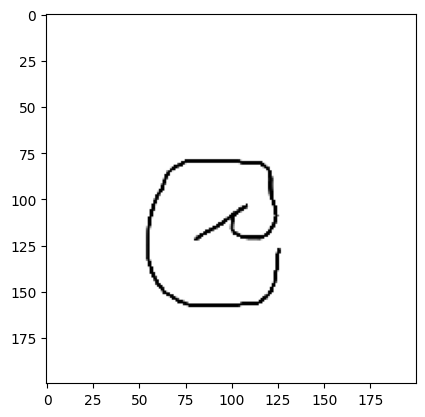

1/1 [==============================] - 0s 41ms/step
This is the character ල


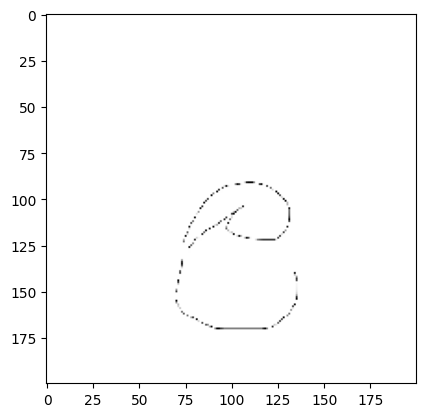

1/1 [==============================] - 0s 38ms/step
This is the character ල


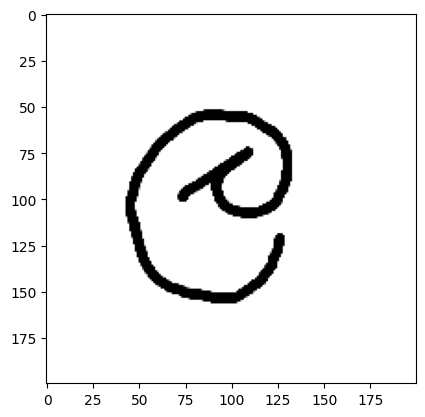

1/1 [==============================] - 0s 38ms/step
This is the character ල


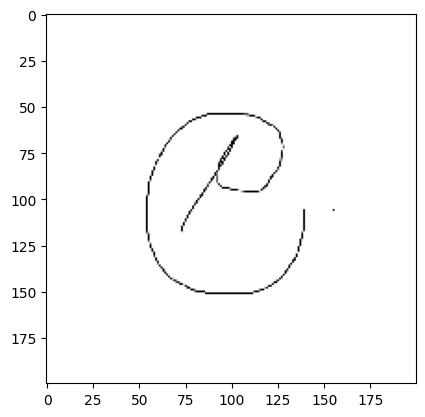

1/1 [==============================] - 0s 36ms/step
This is the character ල


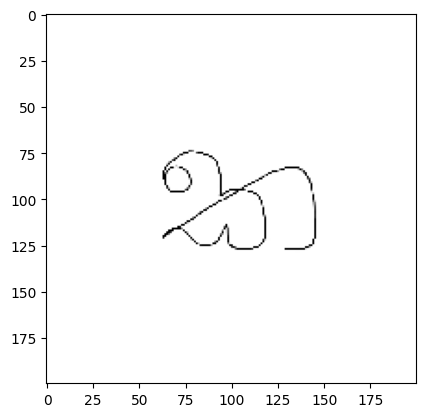

1/1 [==============================] - 0s 38ms/step
This is the character ල


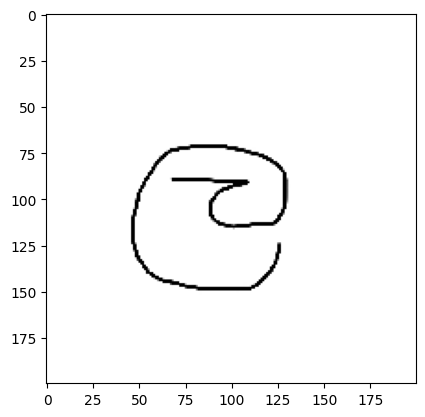

1/1 [==============================] - 0s 43ms/step
This is the character ල


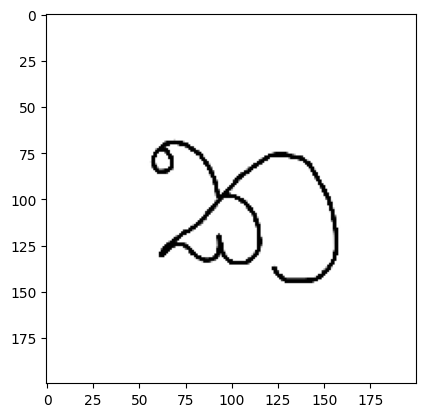

1/1 [==============================] - 0s 38ms/step
This is the character ක


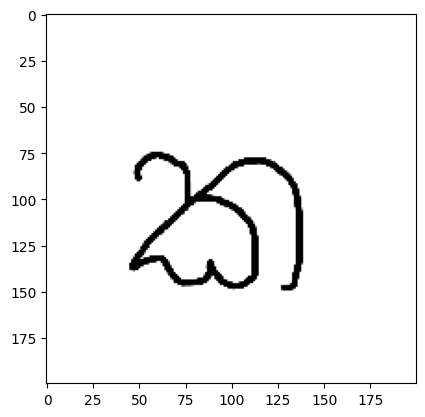

1/1 [==============================] - 0s 43ms/step
This is the character ක


In [35]:
# Path directory where the testing data set is located
dir_path = 'PS-2019-259-TestingData/'

# Loop over each file in the directory
for i in os.listdir(dir_path):
  # Load the image and resize it to the target size
  img = image.load_img(dir_path+ i,target_size=(200,200))
  # Display the image using matplotlib
  plt.imshow(img)
  plt.show()

# Convert the image to a NumPy array and add an extra dimension
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
# Stack the array vertically to create a batch of images
  images = np.vstack([X])
# Make a prediction using the trained model
  val = model.predict(images)
# Check the predicted value and print the corresponding class label
  if val == 0:
    print("This is the character ක")
  else:
    print("This is the character ල")